# Shapely

In [7]:
from shapely.geometry import Polygon, LineString, Point

In [8]:
# Create a Point with coordinates (x, y)
point = Point(2, 3)
print(point)

POINT (2 3)


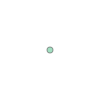

In [9]:
point

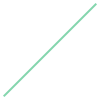

In [10]:
# Create a LineString with a list of Point objects
line = LineString([(0, 0), (1, 1), (2, 2)])
line

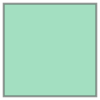

In [11]:
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
polygon

In [12]:
# Get the area and perimeter of a polygon
print(f"Area: {polygon.area}")
print(f"Perimeter: {polygon.length}")

Area: 1.0
Perimeter: 4.0


In [13]:
# Check if a Point is inside a Polygon
print(point.within(polygon))

# Check if two geometries intersect
print(line.intersects(polygon))

False
True


In [14]:
# Union of two polygons
result = polygon.union(Polygon([(1, 1), (1, 2), (2, 2), (2, 1)]))
print(result)

# Intersection of two polygons
result = polygon.intersection(Polygon([(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)]))
print(result)


MULTIPOLYGON (((0 1, 1 1, 1 0, 0 0, 0 1)), ((1 2, 2 2, 2 1, 1 1, 1 2)))
POLYGON ((1 1, 1 0.5, 0.5 0.5, 0.5 1, 1 1))


In [15]:
# Returns the minimum distance (float) to the other geometric object.
Point(0,0).distance(Point(1,1))

1.4142135623730951

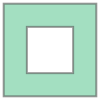

In [16]:
outer_ring = [(0, 0), (0, 4), (4, 4), (4, 0), (0, 0)]

inner_ring = [(1, 1), (1, 3), (3, 3), (3, 1), (1, 1)]

donut = Polygon(outer_ring, [inner_ring])
donut

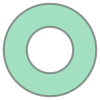

In [17]:
outer_circle = Point(0, 0).buffer(4)

inner_circle = Point(0, 0).buffer(2)

donut = outer_circle.difference(inner_circle)
donut

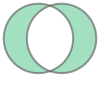

In [25]:
# Symmetric Difference
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
x = a.symmetric_difference(b)
x

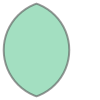

In [26]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
y = a.intersection(b)
y

Transformations

In [27]:
from shapely.affinity import translate
point = Point(2, 3)

# Translate the Point by (1, -1)
translated_point = translate(point, xoff=1, yoff=-1)

print(translated_point)

POINT (3 2)


In [28]:
from shapely.affinity import rotate

# Create a Point at (2, 2)
point = Point(2, 2)

# Rotate the Point 45 degrees counterclockwise around (0, 0)
rotated_point = rotate(point, angle=45, origin=(0, 0))

print(rotated_point)

POINT (0 2.8284271247461903)


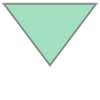

In [34]:
from shapely.affinity import scale

triangle = Polygon([(1, 1), (2, 3), (3, 1)])
triangle_a = scale(triangle, xfact=1.5, yfact=-1)
triangle

In [38]:
triangle_a.exterior.coords[:]

[(0.5, 3.0), (2.0, 1.0), (3.5, 3.0), (0.5, 3.0)]

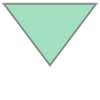

In [37]:
triangle_a

In [30]:
from shapely.affinity import affine_transform

# Create a Point at (1, 1)
point = Point(1, 1)

# Apply an affine transformation matrix (a, b, d, e, xoff, yoff)
transformed_point = affine_transform(point, [2, 1, 1, 2, 3, 4])

print(transformed_point)

POINT (6 7)


Plotting

In [35]:
from shapely.geometry import Point

# Create a list of Points with associated labels
points = [(Point(2, 2), "A"), (Point(4, 4), "B")]

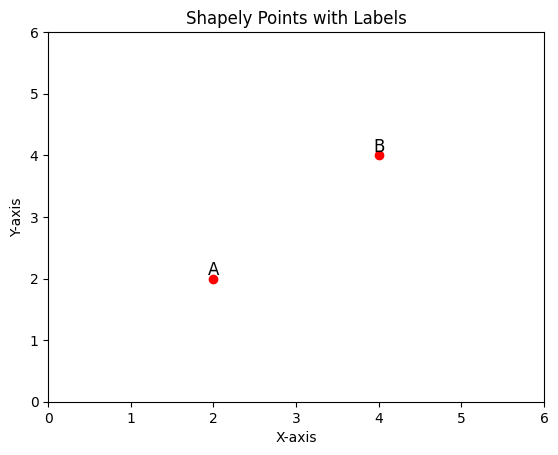

In [36]:
import matplotlib.pyplot as plt

# Create a Matplotlib figure and axis
fig, ax = plt.subplots()

# Iterate through the points and labels, and plot them
for point, label in points:
    x, y = point.x, point.y
    ax.plot(x, y, 'ro')  # 'ro' for red circles
    ax.text(x, y, label, fontsize=12, ha='center', va='bottom')

# Set axis limits if needed
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

# Set axis labels if needed
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Add a title if needed
ax.set_title("Shapely Points with Labels")

# Display the plot
plt.show()